# Lead Scoring Case Study

__Problem Statement :__
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

__Goals of the Case Study :__

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

__We need to follow these steps to came to the conclusion :__
1. Read and Understand Data
2. Cleaning and filling the missing Data
3. Exploratory Data Analysis
4. Prepare the Data for Model Building purpose
5. Build the Model
6. Model Evaluation
7. Making predictions on the test set

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Read And Understand data

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [8]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Now we drop columns having only 1 unique value and are not much useful to make our model
df1 = df.drop(['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Lead Profile','City','How did you hear about X Education','Lead Number'], axis=1)

In [11]:
df.shape

(9240, 37)

In [12]:
# Verifying if the columns are dropped or not
df1.shape

(9240, 27)

In [13]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [14]:
# Removing all columns having equal to or more than 30% null values
df2 = df1.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [15]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [16]:
round(100*(df2.isnull().sum()/len(df2.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

__Now we can see that there is more null values in the above 4 columns i.e., "Country","Specialization","What is your current occupation","What Matters most to you in choosing a course". So now removing those columns will lost most of the data as other columns are also most important so we decided to replace NaN values with "not provided".__

In [17]:
df2['Country'] = df2['Country'].fillna('not provided')
df2['Specialization'] = df2['Specialization'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [18]:
round(100*(df2.isnull().sum()/len(df2.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [19]:
df2['Country'].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [20]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [21]:
df3 = df2[df2.isnull().sum(axis=1)<1]

In [22]:
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [23]:
# Rechecking the percentage of missing values 
round(100*(df3.isnull().sum()/len(df3.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [24]:
# renaming the final dataframe 
df_final = df3
df_final.shape

(9074, 21)

## 2. EDA

### Univariate categorical analysis

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

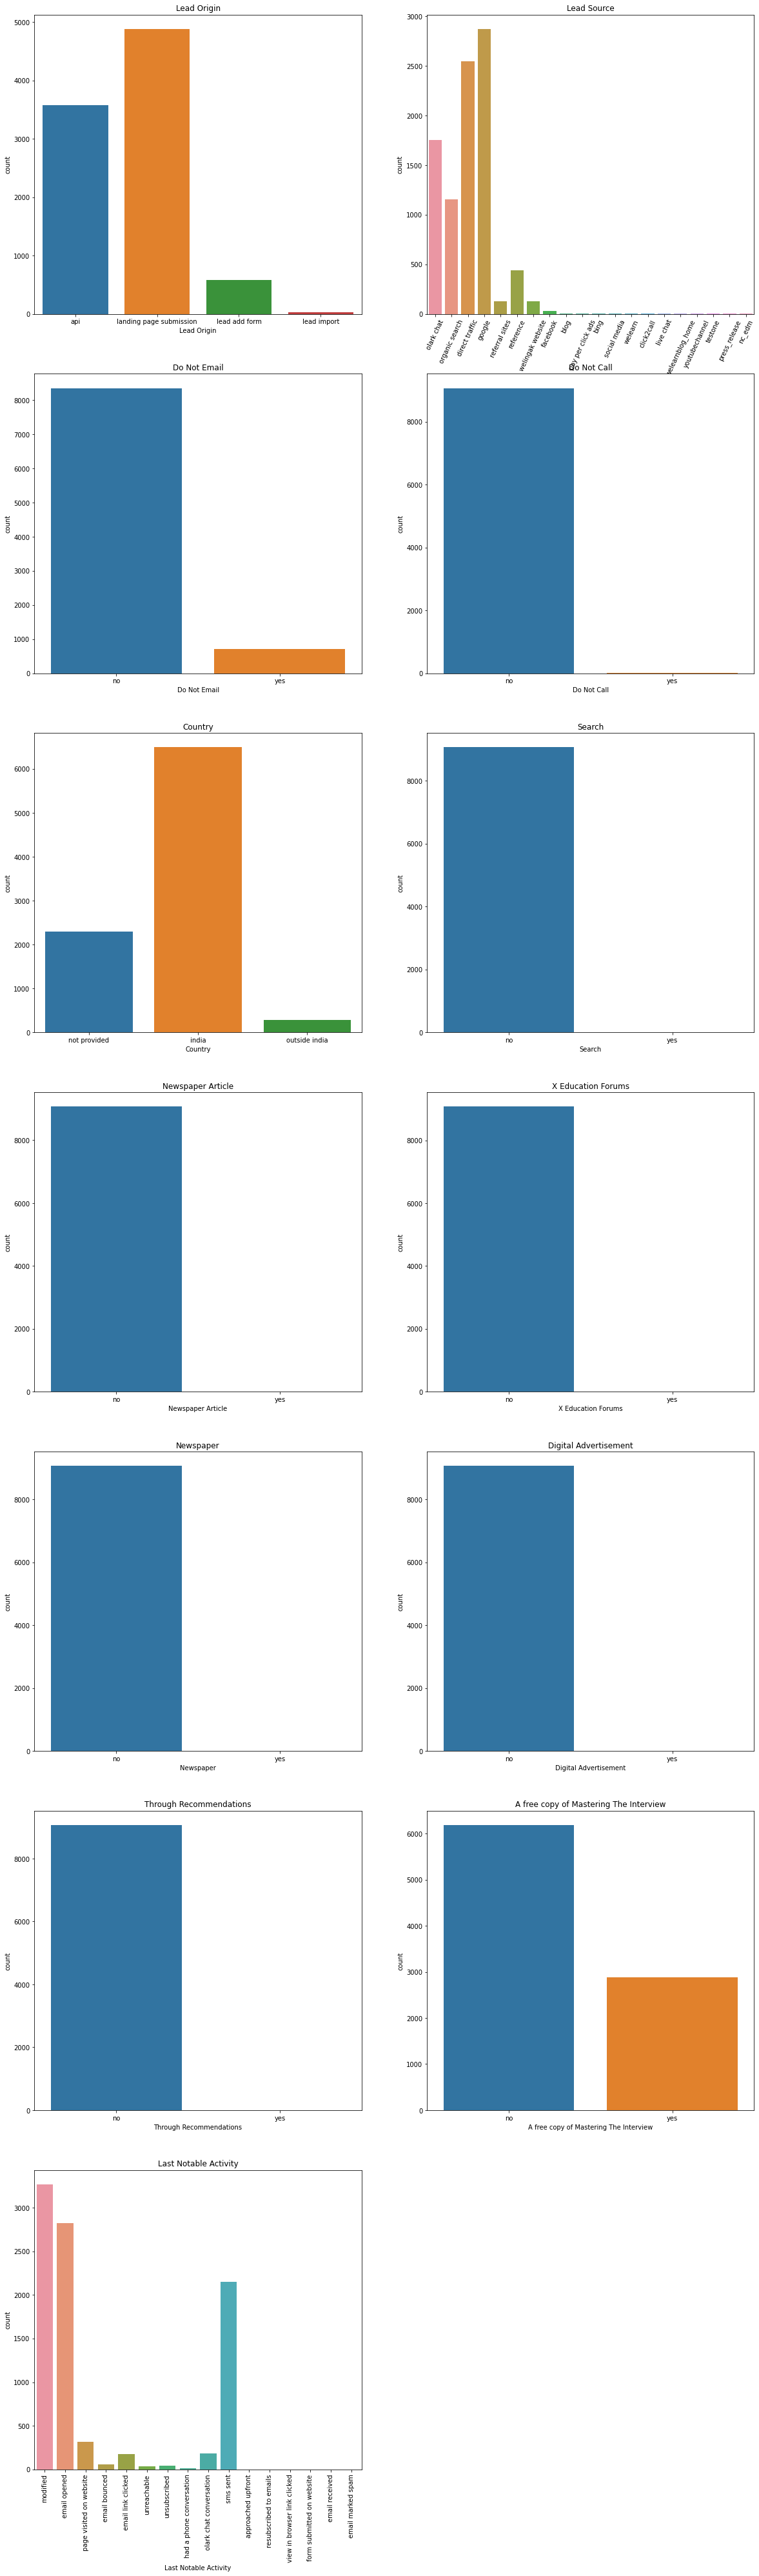

In [26]:
plt.figure(figsize=(20,70))

plt.subplot(7,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(7,2,2)
sns.countplot(df_final['Lead Source'])
plt.xticks(rotation = 65)
plt.title('Lead Source')

plt.subplot(7,2,3)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(7,2,4)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(7,2,5)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(7,2,6)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(7,2,7)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(7,2,8)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(7,2,9)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(7,2,10)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(7,2,11)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(7,2,12)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(7,2,13)
sns.countplot(df_final['Last Notable Activity'])
plt.xticks(rotation = 90)
plt.title('Last Notable Activity')

plt.show()

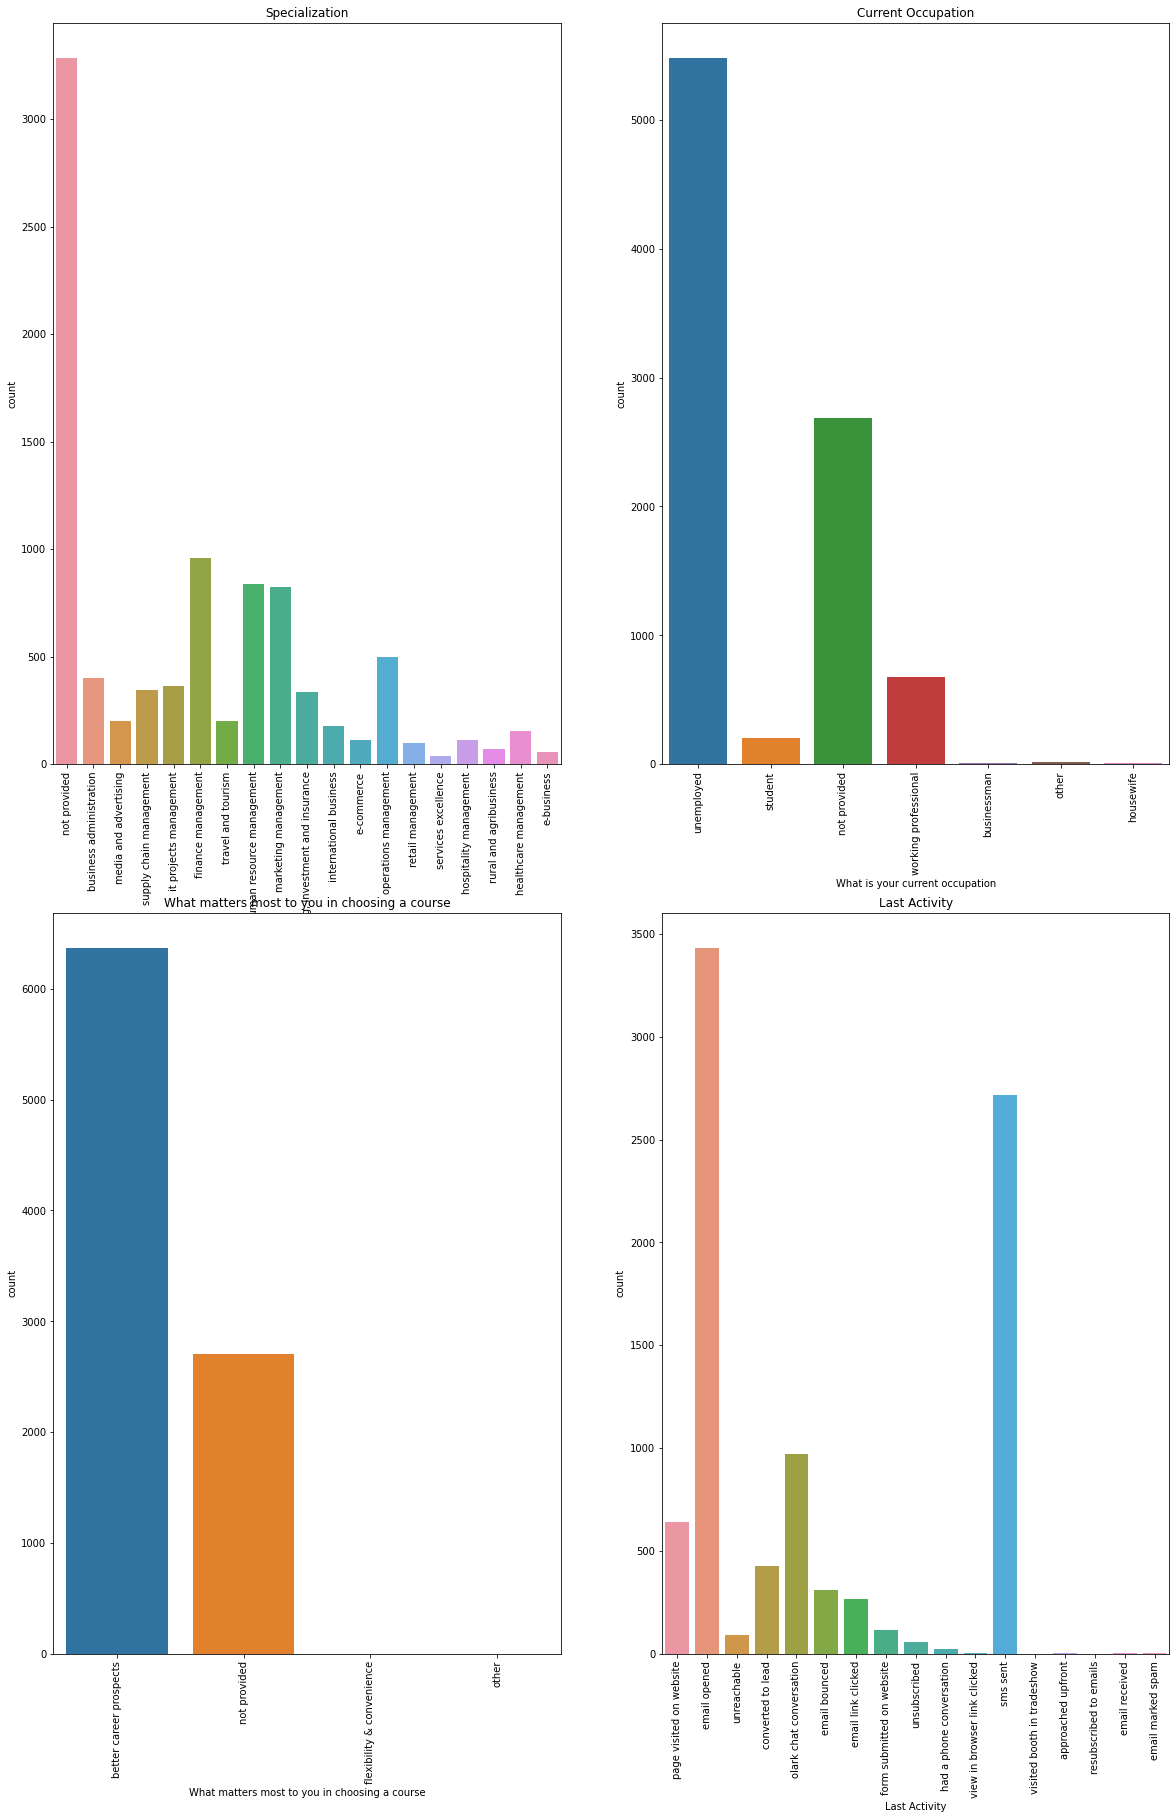

In [27]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

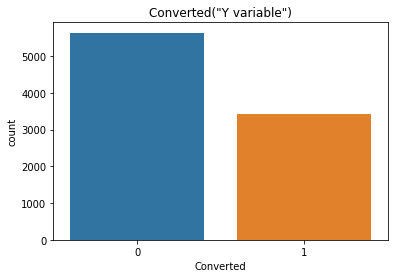

In [28]:
sns.countplot(df_final['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Univariate Numerical Variable Analysis

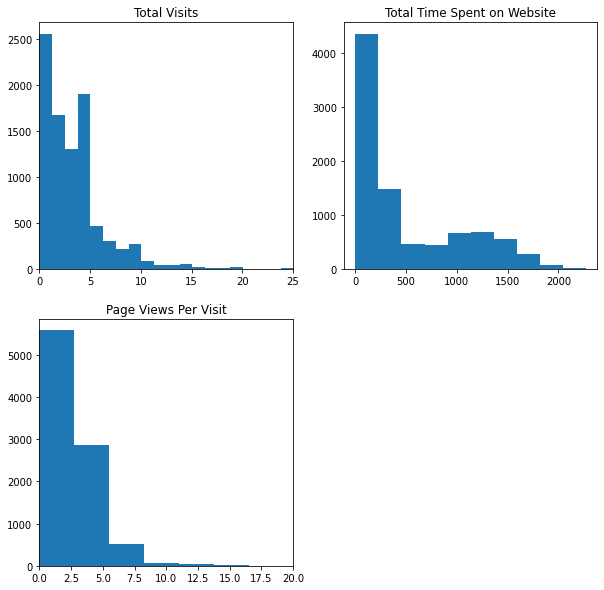

In [29]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [30]:
# Checking if there is any correlation between variables
df_final.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


<AxesSubplot:>

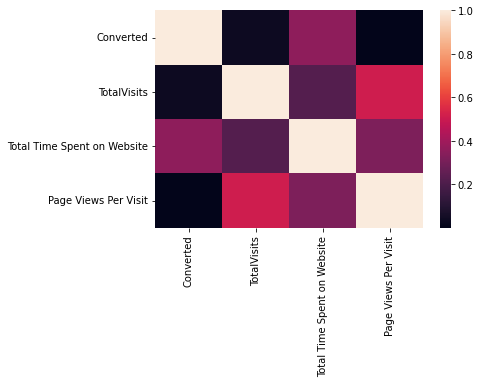

In [31]:
sns.heatmap(df_final.corr())

In [32]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [33]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
# Now we create dummy variables
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Take this to the final df
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Test-Train Split

In [36]:
# Import the required library
from sklearn.model_selection import train_test_split

In [37]:
# Putting other variable in x 
X = df_final_dum.drop(['Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# Putting target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Now splitting the data into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
# Import MinMaxScaler for standardizing the variables
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features 
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


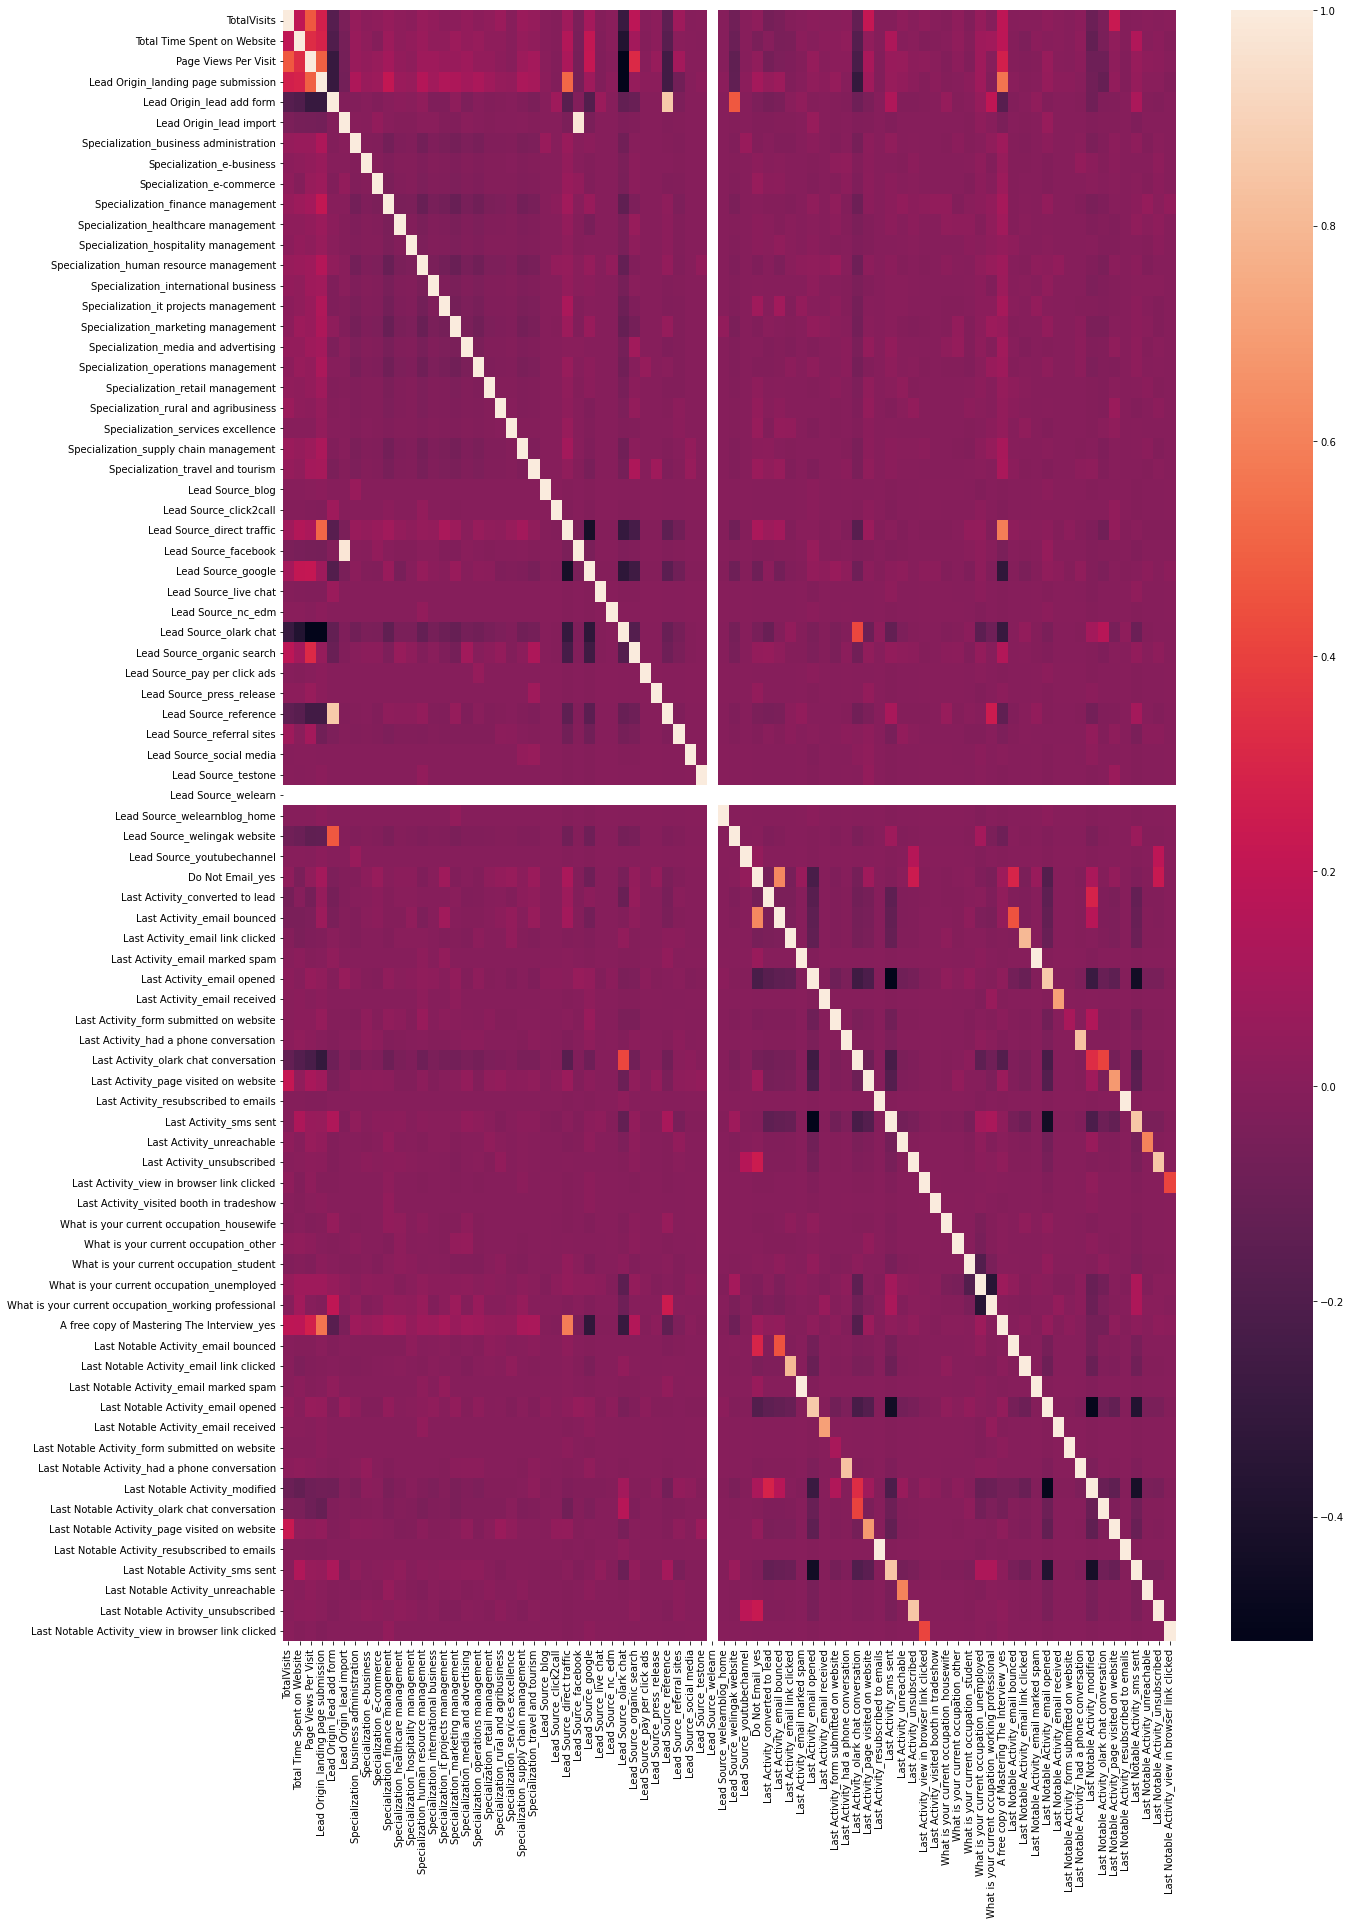

In [41]:
# Check correlation among the variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## 5. Model Building

In [42]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE
from sklearn.feature_selection import RFE

# Import statsmodels
import statsmodels.api as sm

In [45]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [44]:
?RFE

In [46]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_landing page submission', False, 29),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 37),
 ('Specialization_e-business', False, 26),
 ('Specialization_e-commerce', False, 28),
 ('Specialization_finance management', False, 32),
 ('Specialization_healthcare management', False, 30),
 ('Specialization_hospitality management', False, 59),
 ('Specialization_human resource management', False, 33),
 ('Specialization_international business', False, 42),
 ('Specialization_it projects management', False, 31),
 ('Specialization_marketing management', False, 27),
 ('Specialization_media and advertising', False, 53),
 ('Specialization_operations management', False, 35),
 ('Specialization_retail management', False, 49),
 ('Specialization_rural and agribusiness', False, 36),
 ('Specialization_se

In [47]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

# Selecting columns selected by rfe
X_train = X_train[col]

In [48]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.4
Date:                Sun, 11 Sep 2022   Deviance:                       5394.7
Time:                        11:18:17   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2708      0.076     -3.555      0.000      -0.420      -0.122
Total Time Spent on Website                              3.9224      0.145     27.106      0.000       3.639       4.206
Lead Origin_lead add form                                3.4250      0.219     15.616      0.000       2.995       3.855
Lead Source_direct traffic                              -0.5432      0.078     -6.998      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6099      0.325     -1.879      0.060      -1.246       0.026
Lead Source_welingak website                             2.0931      0.758      2.760      0.006       0.607       3.580
Do Not Email_yes                                        -1.8350      0.175    -10.508      0.000      -2.177      -1.493
Last Activity_had a phone conversation                   1.7191      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8061      0.187     -4.309      0.000      -1.173      -0.440
What is your current occupation_housewife               22.5067   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_working professional     2.6689      0.185     14.396      0.000       2.306       3.032
Last Notable Activity_email link clicked                -1.7261      0.258     -6.680      0.000      -2.233      -1.220
Last Notable Activity_email opened                      -1.3835      0.087    -15.893      0.000      -1.554      -1.213
Last Notable Activity_modified                          -1.9244      0.095    -20.260      0.000      -2.111      -1.738
Last Notable Activity_olark chat conversation           -1.6257      0.364     -4.462      0.000      -2.340      -0.912
Last Notable Activity_page visited on website           -1.6793      0.196     -8.561      0.000      -2.064      -1.295
========================================================================================================================
"""

In [49]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_modified,1.74
7,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.48
2,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.33
13,Last Notable Activity_olark chat conversation,1.32
11,Last Notable Activity_email opened,1.30
9,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.13


__The VIF seems to be good as all are below 5 now we remove "What is your current occupation_housewife" because it is having very high p-value.__

In [51]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Sun, 11 Sep 2022   Deviance:                       5403.0
Time:                        11:26:06   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2715      0.076     -3.564      0.000      -0.421      -0.122
Total Time Spent on Website                              3.9239      0.145     27.139      0.000       3.641       4.207
Lead Origin_lead add form                                3.4468      0.219     15.738      0.000       3.018       3.876
Lead Source_direct traffic                              -0.5429      0.078     -7.000      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6120      0.325     -1.886      0.059      -1.248       0.024
Lead Source_welingak website                             2.0700      0.758      2.729      0.006       0.584       3.556
Do Not Email_yes                                        -1.8358      0.175    -10.509      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.7194      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8062      0.187     -4.310      0.000      -1.173      -0.440
What is your current occupation_working professional     2.6654      0.185     14.375      0.000       2.302       3.029
Last Notable Activity_email link clicked                -1.7148      0.257     -6.676      0.000      -2.218      -1.211
Last Notable Activity_email opened                      -1.3768      0.087    -15.829      0.000      -1.547      -1.206
Last Notable Activity_modified                          -1.9240      0.095    -20.255      0.000      -2.110      -1.738
Last Notable Activity_olark chat conversation           -1.6255      0.364     -4.461      0.000      -2.340      -0.911
Last Notable Activity_page visited on website           -1.6791      0.196     -8.560      0.000      -2.064      -1.295
========================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_modified,1.74
7,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.47
2,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.32
10,Last Notable Activity_email opened,1.29
8,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.13


__The VIF seems to be good as all are below 5 now we remove "Last Activity_had a phone conversation" because it is having very high p-value.__

In [53]:
X_train.drop('Last Activity_had a phone conversation', axis = 1, inplace = True)

# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.5
Date:                Sun, 11 Sep 2022   Deviance:                       5409.0
Time:                        11:29:27   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3821
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2607      0.076     -3.431      0.001      -0.410      -0.112
Total Time Spent on Website                              3.9255      0.145     27.162      0.000       3.642       4.209
Lead Origin_lead add form                                3.4420      0.219     15.717      0.000       3.013       3.871
Lead Source_direct traffic                              -0.5471      0.078     -7.057      0.000      -0.699      -0.395
Lead Source_referral sites                              -0.5808      0.320     -1.813      0.070      -1.209       0.047
Lead Source_welingak website                             2.0701      0.758      2.729      0.006       0.584       3.557
Do Not Email_yes                                        -1.8416      0.175    -10.536      0.000      -2.184      -1.499
Last Activity_olark chat conversation                   -0.8150      0.187     -4.358      0.000      -1.182      -0.448
What is your current occupation_working professional     2.6623      0.185     14.360      0.000       2.299       3.026
Last Notable Activity_email link clicked                -1.7249      0.257     -6.717      0.000      -2.228      -1.222
Last Notable Activity_email opened                      -1.3869      0.087    -15.961      0.000      -1.557      -1.217
Last Notable Activity_modified                          -1.9268      0.095    -20.307      0.000      -2.113      -1.741
Last Notable Activity_olark chat conversation           -1.6275      0.364     -4.467      0.000      -2.342      -0.913
Last Notable Activity_page visited on website           -1.6894      0.196     -8.613      0.000      -2.074      -1.305
========================================================================================================================
"""

__The VIF seems to be good as all are below 5 now we remove "Lead Source_referral sites" because it is having very high p-value.__

In [54]:
X_train.drop('Lead Source_referral sites', axis = 1, inplace = True)

# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.3
Date:                Sun, 11 Sep 2022   Deviance:                       5412.6
Time:                        11:31:37   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2674      0.076     -3.523      0.000      -0.416      -0.119
Total Time Spent on Website                              3.9223      0.144     27.156      0.000       3.639       4.205
Lead Origin_lead add form                                3.4522      0.219     15.766      0.000       3.023       3.881
Lead Source_direct traffic                              -0.5363      0.077     -6.937      0.000      -0.688      -0.385
Lead Source_welingak website                             2.0698      0.759      2.729      0.006       0.583       3.556
Do Not Email_yes                                        -1.8412      0.175    -10.528      0.000      -2.184      -1.498
Last Activity_olark chat conversation                   -0.8226      0.187     -4.392      0.000      -1.190      -0.455
What is your current occupation_working professional     2.6584      0.185     14.337      0.000       2.295       3.022
Last Notable Activity_email link clicked                -1.7319      0.256     -6.754      0.000      -2.234      -1.229
Last Notable Activity_email opened                      -1.3889      0.087    -15.993      0.000      -1.559      -1.219
Last Notable Activity_modified                          -1.9326      0.095    -20.385      0.000      -2.118      -1.747
Last Notable Activity_olark chat conversation           -1.6129      0.364     -4.426      0.000      -2.327      -0.899
Last Notable Activity_page visited on website           -1.7017      0.196     -8.673      0.000      -2.086      -1.317
========================================================================================================================
"""

__Much better than before as all the VIF values now less than 5 and p-values are also less than 0.05. So now we can fix the model!!!__

## 6.Creating Predictions

In [55]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.183455
1012    0.586189
9226    0.099750
4750    0.835883
7987    0.513681
1281    0.812522
2880    0.161210
4971    0.917924
7536    0.784601
1248    0.475380
dtype: float64

In [56]:
# Reshape this to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18345475, 0.58618922, 0.09975026, 0.83588315, 0.51368099,
       0.81252245, 0.16120983, 0.91792385, 0.7846014 , 0.47537976])

In [57]:
# Data frame with given conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183455
1,0,0.586189
2,0,0.099750
3,1,0.835883
4,1,0.513681


In [58]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.183455,0
1,0,0.586189,1
2,0,0.099750,0
3,1,0.835883,1
4,1,0.513681,1


## 7. Model Evaluation

In [59]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [63]:
# Creating confusion metrics(TP,TN,FP,FN)
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3430,  475],
       [ 834, 1612]], dtype=int64)

In [64]:
# Predicted --> not_churn    churn
# Actual
# not_churn        3430       475
# churn             834      1612

In [65]:
# Now will check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7938907258699417

#### Its almost 80% of accuracy which is not bad at all.

In [66]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [67]:
# Calculating sensitivity
TP/(TP + FN)

0.6590351594439902

In [68]:
# Calculating specificity
TN/(TN + FP)

0.8783610755441741

___With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 66% and specificity of around 88%.___

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [69]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

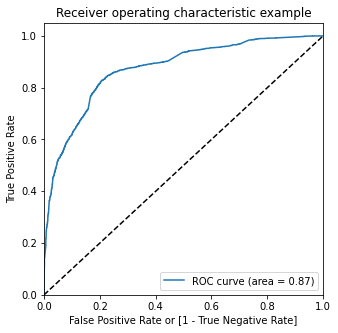

In [72]:
# Now call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

__The area under curve is 0.87 which is very good value.__

In [73]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183455,0,1,1,0,0,0,0,0,0,0,0
1,0,0.586189,1,1,1,1,1,1,1,0,0,0,0
2,0,0.099750,0,1,0,0,0,0,0,0,0,0,0
3,1,0.835883,1,1,1,1,1,1,1,1,1,1,0
4,1,0.513681,1,1,1,1,1,1,1,0,0,0,0


In [74]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.555188,0.970564,0.295006
0.2,0.2,0.746497,0.882257,0.661460
0.3,0.3,0.799402,0.848324,0.768758
0.4,0.4,0.806645,0.789043,0.817670
0.5,0.5,0.793891,0.659035,0.878361
0.6,0.6,0.790269,0.577269,0.923688
0.7,0.7,0.781452,0.506132,0.953905
0.8,0.8,0.755944,0.410875,0.972087
0.9,0.9,0.711069,0.266558,0.989501


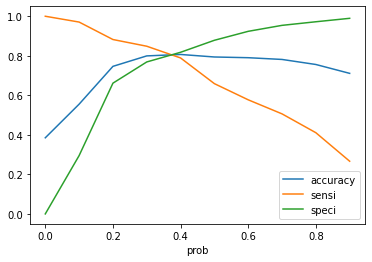

In [77]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

___From the graph it is visible that the optimal cut off is at 0.35.___

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183455,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586189,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099750,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.835883,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513681,1,1,1,1,1,1,1,0,0,0,0,1


In [79]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8069595339316643

In [80]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3113,  792],
       [ 434, 2012]], dtype=int64)

In [81]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [82]:
# Calculating the sensitivity
TP/(TP+FN)

0.8225674570727719

In [83]:
# Calculating the specificity
TN/(TN+FP)

0.7971830985915493

___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___

## 8. Prediction on Test set

In [84]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [85]:
# Substituting all the columns in the final train model
col = X_train.columns

In [86]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.0,0.070530,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0,1,0,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.264600,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.599730,0,1,0,0,0,0,0,0,0,0,0
7155,1.0,0.231357,0,1,0,0,0,0,0,0,1,0,0


In [87]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201064
1,1,0.958183
2,0,0.178593
3,1,0.777685
4,0,0.203052


In [88]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.201064,0
1,1,0.958183,1
2,0,0.178593,0
3,1,0.777685,1
4,0,0.203052,0
...,...,...,...
2718,0,0.323165,0
2719,0,0.238276,0
2720,1,0.824714,1
2721,0,0.138370,0


In [89]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.799118619170033

In [90]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1378,  356],
       [ 191,  798]], dtype=int64)

In [91]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [92]:
# Calculating the sensitivity
TP/(TP+FN)

0.8068756319514662

In [93]:
# Calculating the specificity
TN/(TN+FP)

0.7946943483275664

__With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.__

## 9.Precision-Recall

In [94]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3430,  475],
       [ 834, 1612]], dtype=int64)

In [95]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7724005749880211

In [96]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6590351594439902

___With the current cut off as 0.35 we have Precision around 77% and Recall around 66%___

### 9.1. Precision and recall tradeoff


In [97]:
from sklearn.metrics import precision_recall_curve

In [98]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [99]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

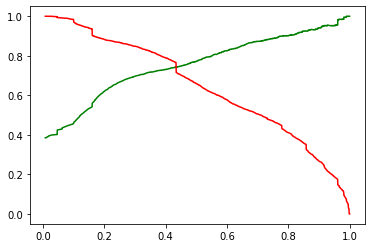

In [100]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183455,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586189,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099750,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.835883,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513681,1,1,1,1,1,1,1,0,0,0,0,1


In [102]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807746811525744

In [103]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3215,  690],
       [ 531, 1915]], dtype=int64)

In [104]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [105]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7351247600767754

In [106]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7829108748977923

___With the current cut off as 0.41 we have Precision around 74% and Recall around 78%___

## 10. Prediction on Test Set

In [107]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201064
1,1,0.958183
2,0,0.178593
3,1,0.777685
4,0,0.203052


In [108]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.201064,0
1,1,0.958183,1
2,0,0.178593,0
3,1,0.777685,1
4,0,0.203052,0
...,...,...,...
2718,0,0.323165,0
2719,0,0.238276,0
2720,1,0.824714,1
2721,0,0.138370,0


In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8031582813073815

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1429,  305],
       [ 231,  758]], dtype=int64)

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [112]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7130761994355598

In [113]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7664307381193124

___With the current cut off as 0.41 we have Precision around 71% and Recall around 77%___

# Conclusion

__It was found that the variables that mattered the most in the potential buyers are (In descending order) :__

1. The total time spend on the Website.
2. Total number of visits.
3. When the lead source was:
    a. Google
    b. Direct traffic
    c. Organic search
    d. Welingak website
4. When the last activity was:
    a. SMS
    b. Olark chat conversation
5. When the lead origin is Lead add format.
6. When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.